## **Import libraries**

In [65]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Activation, Input, Flatten, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## **Download the dataset**

Download and extract the dataset from the below link in a folder.

https://drive.google.com/file/d/1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P/view?usp=sharing

In [66]:
import gdown
import zipfile
import os

# Set the URL for the dataset
url = 'https://drive.google.com/uc?id=1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P'

# Set the destination folder for the dataset
destination = '/content/dataset/'

# Create the destination folder if it doesn't exist
os.makedirs(destination, exist_ok=True)

# Download the dataset zip file
output = '/content/dataset.zip'
gdown.download(url, output, quiet=False)

# Extract the contents of the zip file
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(destination)

# Print a message indicating successful download and extraction
print(f'Dataset downloaded and extracted to {destination}')

Downloading...
From: https://drive.google.com/uc?id=1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P
To: /content/dataset.zip
100%|██████████| 65.7M/65.7M [00:00<00:00, 192MB/s]


Dataset downloaded and extracted to /content/dataset/


## **Read image files from directory**

To be familiar with keras dataset loading and preprocessing you can use the below link:

https://keras.io/api/preprocessing/image/

Please set ***validation_split = 0.2***

In [67]:
import tensorflow as tf

# Define the dataset directory
dataset_directory = '/content/dataset'

# Define class names
class_names = ['no', 'yes']

# Define data parameters
batch_size = 64
image_size = (256, 256)
validation_split = 0.2
seed = 20

# Create the full dataset with colored images
(training_data, validation_data_o) = tf.keras.utils.image_dataset_from_directory(
    dataset_directory,
    labels='inferred',
    label_mode='int',
    class_names=class_names,
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=validation_split,
    subset='both',
    seed=seed
)

validation_size = int(0.2 * len(validation_data_o))
test_data = validation_data_o.take(validation_size)
validation_data = validation_data_o.skip(validation_size)

Found 3000 files belonging to 2 classes.
Using 2400 files for training.
Using 600 files for validation.


## **Display the dataset**

Plot some samples from the dataset to see and know what are you working with.

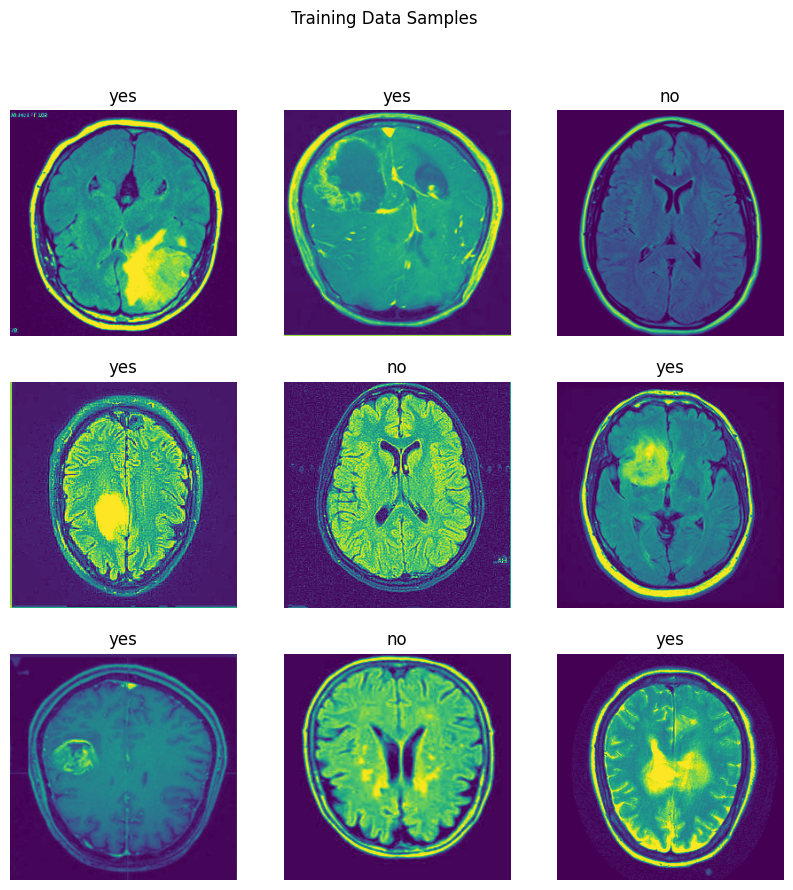

In [68]:
import matplotlib.pyplot as plt

# Function to show images with labels
def show_images(dataset, class_names):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):  # take a batch of data
        for i in range(min(9, len(images))):  # show up to 9 images
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

# Show training data samples
show_images(training_data, class_names)
plt.suptitle('Training Data Samples')
plt.show()


## **Build the models**

In this section you will build the model with two approaches.
First you should build it with the Sequential API and then you have to work with the Functional API in the second part.

You can use the below link to know more about these two APIs.

Keep the architecture as simple as possible.

https://medium.com/analytics-vidhya/keras-model-sequential-api-vs-functional-api-fc1439a6fb10

## **1.Sequential API**

### **Build a model**

In [69]:
# Build Sequential model
seqential_model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 1)),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
seqential_model.compile(optimizer='adam',
                          loss='binary_crossentropy',
                          metrics=['accuracy'])


### **Train the model**

In [70]:
history = seqential_model.fit(training_data, epochs=5, validation_data=validation_data)

Epoch 1/5
38/38 [==============================] - 7s 116ms/step - loss: 64.9637 - accuracy: 0.7021 - val_loss: 2.6919 - val_accuracy: 0.8284
Epoch 2/5
38/38 [==============================] - 3s 75ms/step - loss: 1.5238 - accuracy: 0.8858 - val_loss: 1.2545 - val_accuracy: 0.9004
Epoch 3/5
38/38 [==============================] - 4s 99ms/step - loss: 0.3753 - accuracy: 0.9575 - val_loss: 0.5538 - val_accuracy: 0.9534
Epoch 4/5
38/38 [==============================] - 3s 78ms/step - loss: 0.0644 - accuracy: 0.9883 - val_loss: 0.5001 - val_accuracy: 0.9449
Epoch 5/5
38/38 [==============================] - 3s 75ms/step - loss: 0.0345 - accuracy: 0.9933 - val_loss: 0.4401 - val_accuracy: 0.9576


### **Test the model**

In [71]:
test_loss, test_accuracy = seqential_model.evaluate(test_data)

2/2 [==============================] - 0s 64ms/step - loss: 0.4147 - accuracy: 0.9531


### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

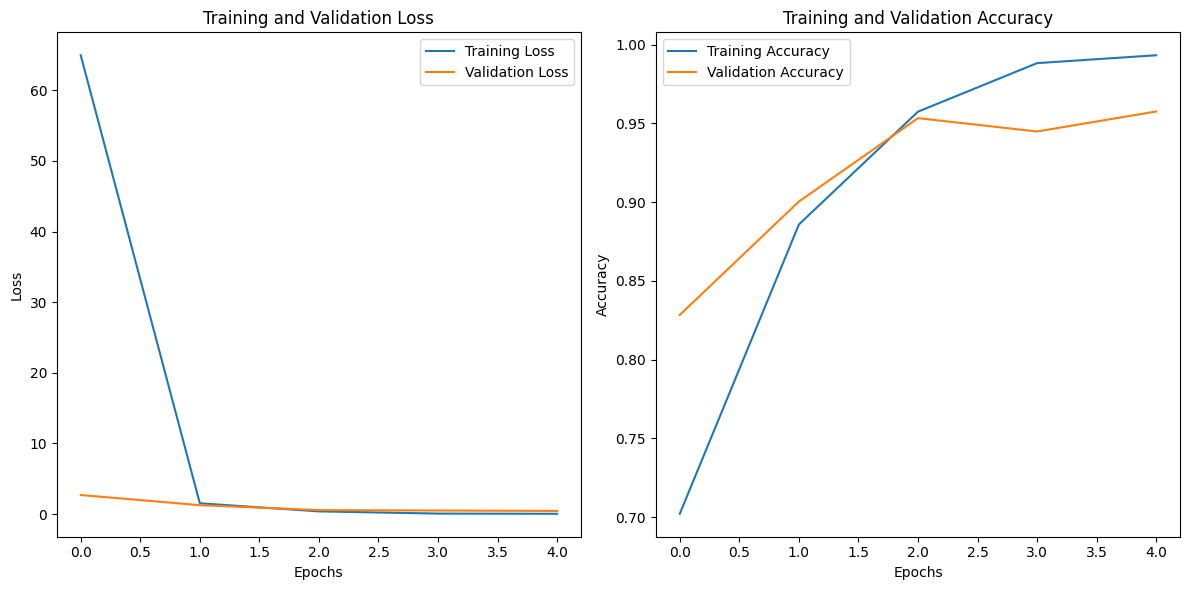

In [72]:
# Plotting training and validation losses
plt.figure(figsize=(12, 6))

# Plotting training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
# Plotting validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## **2.Functional API**

### **Build a model**

In [75]:
input_shape = (256, 256, 1)
input_layer = Input(shape=input_shape)

prev = Conv2D(16, (3, 3), activation='relu')(input_layer)
prev = MaxPool2D((2, 2))(prev)
prev = Flatten()(prev)
prev = Dense(32, activation='relu')(prev)
output_layer = Dense(1, activation='sigmoid')(prev)  # Assuming binary classification ('yes' or 'no')

functional_model = Model(inputs=input_layer, outputs=output_layer)

functional_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### **Train the model**

In [76]:
history = functional_model.fit(training_data, epochs=5, validation_data=validation_data)

Epoch 1/5
38/38 [==============================] - 5s 94ms/step - loss: 688.7628 - accuracy: 0.6908 - val_loss: 292.1403 - val_accuracy: 0.6398
Epoch 2/5
38/38 [==============================] - 4s 89ms/step - loss: 61.9002 - accuracy: 0.8267 - val_loss: 19.6188 - val_accuracy: 0.8729
Epoch 3/5
38/38 [==============================] - 3s 77ms/step - loss: 5.4022 - accuracy: 0.9521 - val_loss: 11.7088 - val_accuracy: 0.9174
Epoch 4/5
38/38 [==============================] - 3s 74ms/step - loss: 3.0249 - accuracy: 0.9650 - val_loss: 7.7578 - val_accuracy: 0.9470
Epoch 5/5
38/38 [==============================] - 4s 109ms/step - loss: 2.8716 - accuracy: 0.9650 - val_loss: 8.3411 - val_accuracy: 0.9301


### **Test the model**

In [77]:
test_loss, test_accuracy = functional_model.evaluate(test_data)

2/2 [==============================] - 0s 124ms/step - loss: 9.4408 - accuracy: 0.9141


### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

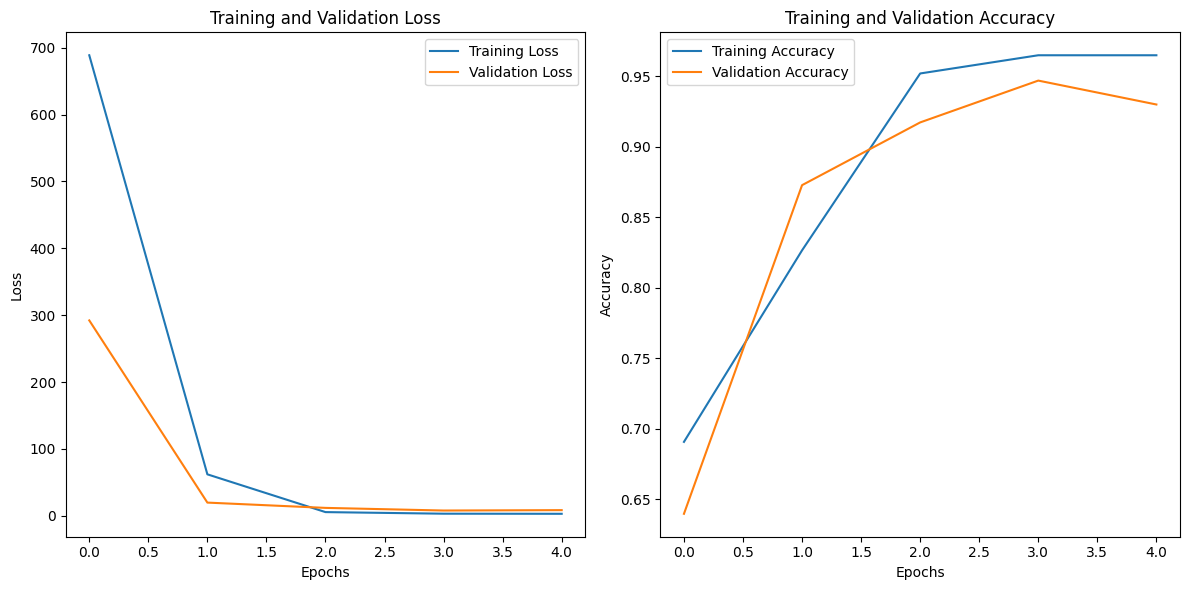

In [78]:
# Plotting training and validation losses
plt.figure(figsize=(12, 6))

# Plotting training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
# Plotting validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()